# Resnet - continue training from checkpoint

Raw images (no bounding box)

In [1]:
import os
import torch
from torchvision.datasets import ImageFolder

import my_paths

from my_sysinfo import get_device

import my_transforms

import my_models

from my_train_model import training_loop

from my_test_model import test_model

In [2]:
BATCH_SIZE = 128
NUM_WORKERS = 2

modified the code to train no matter whether the original weights were saved or not;

In [3]:
def validate_model(model_id, make_model, train_data_path, test_data_path, transforms, test_transforms, loops):
    SAVED_MODEL_PATH = os.path.join(my_paths.models, model_id + '.pth')
    device = get_device()
    model = make_model(device)

    if os.path.exists(SAVED_MODEL_PATH):
        print('Loading model from', SAVED_MODEL_PATH)
        model.load_state_dict(torch.load(SAVED_MODEL_PATH))

    train_dataset = ImageFolder(train_data_path, transform=transforms)
    train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
    training_loop(loops, model, train_data_loader, device)
    torch.save(model.state_dict(), SAVED_MODEL_PATH)

    test_dataset = ImageFolder(test_data_path, transform=test_transforms)
    test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
    
    test_model(model, test_data_loader, device)

## 6. Resnet18 raw augmented images random split

PyTorch version: 2.5.1
CUDA available: True
CUDA version: 12.4
GPU device: NVIDIA GeForce RTX 2060
Using device: cuda


c:\Users\lootman\anaconda3\envs\avpr\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\lootman\anaconda3\envs\avpr\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from c:\projects\avpr-assignment-2\models\resnet-random-raw-augmented.pth
Epoch 1 started.


C:\Users\lootman\AppData\Local\Temp\ipykernel_30436\4156994176.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(SAVED_MODEL_PATH))


loss: 0.261333  [  128/ 7668]
loss: 0.406190  [  768/ 7668]
loss: 0.528704  [ 1408/ 7668]
loss: 0.420253  [ 2048/ 7668]
loss: 0.412222  [ 2688/ 7668]
loss: 0.462200  [ 3328/ 7668]
loss: 0.532445  [ 3968/ 7668]
loss: 0.293699  [ 4608/ 7668]
loss: 0.462769  [ 5248/ 7668]
loss: 0.579629  [ 5888/ 7668]
loss: 0.563876  [ 6528/ 7668]
loss: 0.443298  [ 7168/ 7668]
Epoch 1 completed. Loss: 0.3860836923122406
Epoch 2 started.
loss: 0.340032  [  128/ 7668]
loss: 0.470601  [  768/ 7668]
loss: 0.275842  [ 1408/ 7668]
loss: 0.358780  [ 2048/ 7668]
loss: 0.245846  [ 2688/ 7668]
loss: 0.329442  [ 3328/ 7668]
loss: 0.345779  [ 3968/ 7668]
loss: 0.433011  [ 4608/ 7668]
loss: 0.331963  [ 5248/ 7668]
loss: 0.387896  [ 5888/ 7668]
loss: 0.435972  [ 6528/ 7668]
loss: 0.259857  [ 7168/ 7668]
Epoch 2 completed. Loss: 0.5890482068061829
Epoch 3 started.
loss: 0.232244  [  128/ 7668]
loss: 0.326840  [  768/ 7668]
loss: 0.319843  [ 1408/ 7668]
loss: 0.323917  [ 2048/ 7668]
loss: 0.342102  [ 2688/ 7668]
loss: 0.

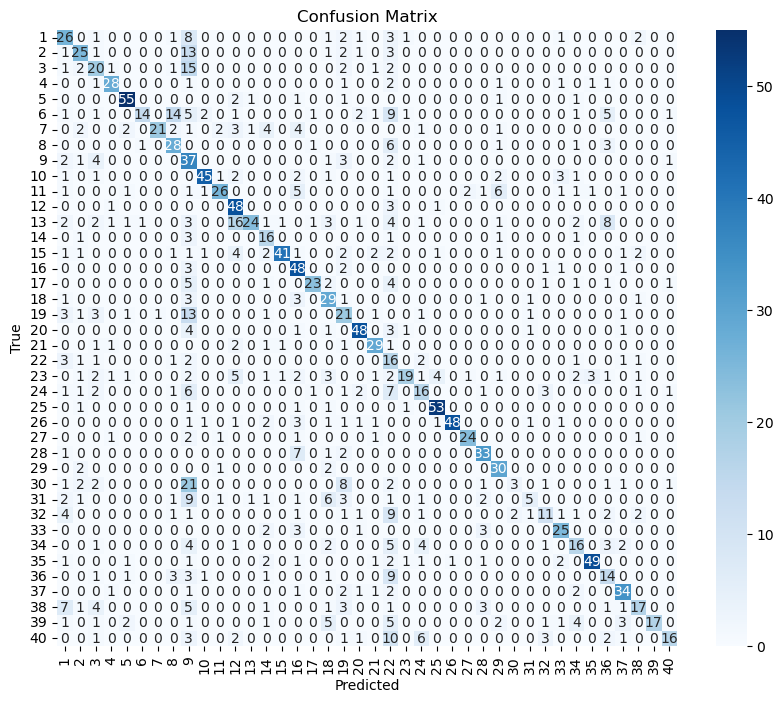

In [4]:
validate_model(
    'resnet-random-raw-augmented',
    my_models.resnet.make_model,
    my_paths.random_splits_train,
    my_paths.random_splits_test,
    my_transforms.get_resnet_augmented_transforms(),
    my_transforms.get_resnet_transforms(),
    20
)